In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load dataset
df = pd.read_csv('./dataset/heart-3.csv')

# Define numeric and categorical columns
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
cat_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Scale numeric features
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Encode categorical features
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Interaction terms for feature pairs
interaction_terms = {
    'Age_Chol': df['Age'] * df['Cholesterol'],
    'Age_MaxHR': df['Age'] * df['MaxHR'],
    'Age_ST_Slope': df['Age'] * df['ST_Slope'],
    'ChestPain_ST_Slope': df['ChestPainType'] * df['ST_Slope'],
    'ExerciseAngina_Oldpeak': df['ExerciseAngina'] * df['Oldpeak'],
    'Cholesterol_FastingBS': df['Cholesterol'] * df['FastingBS'],
    'RestingBP_Age': df['RestingBP'] * df['Age'],
    'Sex_ChestPain': df['Sex'] * df['ChestPainType'],
    'ST_Slope_Oldpeak': df['ST_Slope'] * df['Oldpeak']
}

# Add interaction terms to the dataset
for name, term in interaction_terms.items():
    df[name] = term

# Retain only interaction features and the target column
df_engineered = df[list(interaction_terms.keys()) + ['HeartDisease']]

# Prepare data
df_engineered = df_engineered.dropna()

# Display the engineered dataset
display(df_engineered)

,Age_Chol,Age_MaxHR,Age_ST_Slope,ChestPain_ST_Slope,ExerciseAngina_Oldpeak,Cholesterol_FastingBS,RestingBP_Age,Sex_ChestPain,ST_Slope_Oldpeak,HeartDisease
0,-1.182441,-1.981929,-2.866280,2,-0.000000,0.000000,-0.588890,1,-1.664865,0
1,0.082281,-0.360852,-0.478484,2,0.000000,-0.000000,-0.713779,0,0.105664,1
2,-1.348875,2.671063,-3.502717,2,-0.000000,0.000000,0.226823,1,-1.664865,0
3,-0.081276,0.661809,-0.584556,0,0.574711,0.000000,-0.177018,0,0.574711,1
4,-0.001803,-0.030194,0.103762,4,-0.000000,-0.000000,0.049356,2,-1.664865,0
...,...,...,...,...,...,...,...,...,...,...
913,-0.538409,0.170624,-0.902775,3,0.000000,0.000000,1.092680,3,0.293283,1
914,-0.081531,0.253104,1.536902,0,0.000000,-0.053049,0.963757,0,2.357094,1
915,-0.229524,-0.317201,0.370100,0,0.293283,-0.000000,-0.047933,0,0.293283,1
916,0.125936,0.540910,0.370100,1,-0.000000,0.000000,-0.047933,0,-0.832432,1


In [44]:
target_column = 'HeartDisease'
# Remove the target column from the feature matrix
X = df_engineered.drop(target_column, axis=1)
# X1=df.drop(target_column, axis=1)
y = df_engineered[target_column]

# Convert feature matrix and target vector to NumPy arrays
X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC(probability=True),
    'XGBoost': XGBClassifier(eval_metric='logloss')
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else 'N/A'
    results[name] = {'Accuracy': accuracy, 'ROC AUC': roc_auc}

# Display results
for model_name, metrics in results.items():
    print(f"{model_name}: Accuracy = {metrics['Accuracy']:.4f}, ROC AUC = {metrics['ROC AUC']}")

Logistic Regression: Accuracy = 0.8261, ROC AUC = 0.8772909333656996
Random Forest: Accuracy = 0.8587, ROC AUC = 0.9120038839665008
SVM: Accuracy = 0.8533, ROC AUC = 0.8730428450054618
XGBoost: Accuracy = 0.8315, ROC AUC = 0.8845733705546789


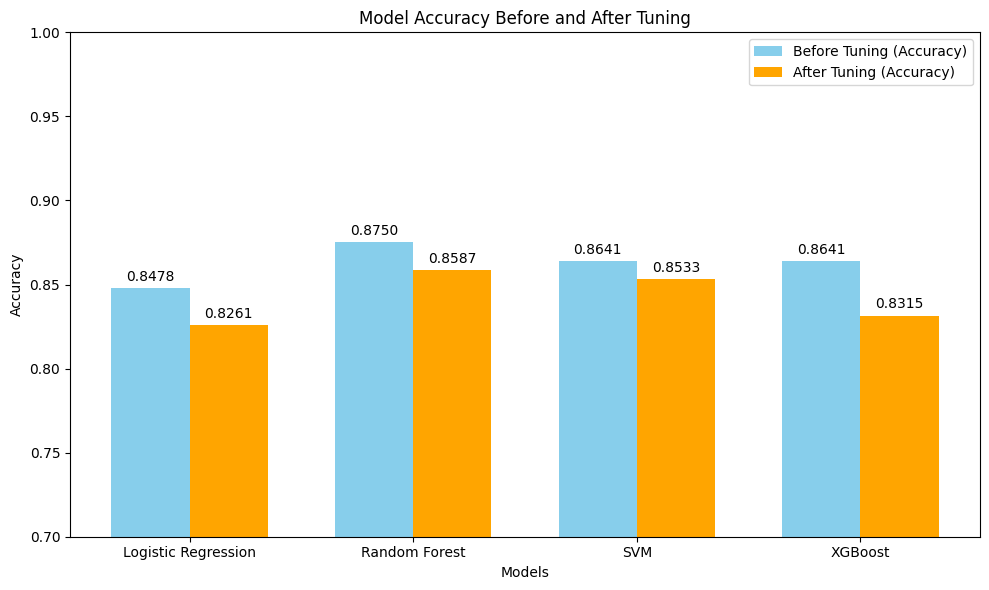

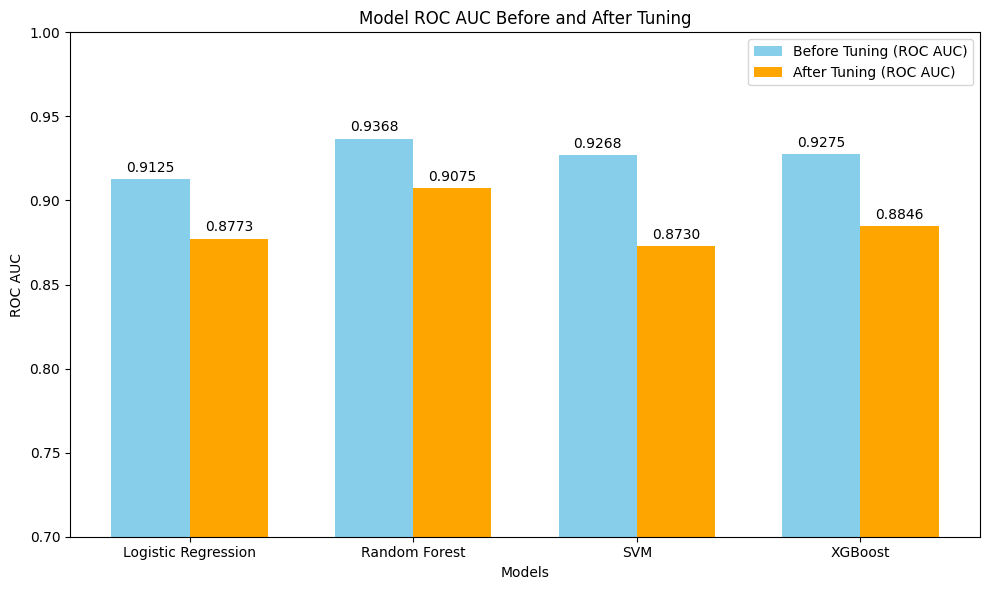

In [ ]:
target_column = 'HeartDisease'
# Remove the target column from the feature matrix
X = df_engineered.drop(target_column, axis=1)
# X1=df.drop(target_column, axis=1)
y = df_engineered[target_column]

# Convert feature matrix and target vector to NumPy arrays
X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC(probability=True),
    'XGBoost': XGBClassifier(eval_metric='logloss')
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else 'N/A'
    results[name] = {'Accuracy': accuracy, 'ROC AUC': roc_auc}

# Display results
for model_name, metrics in results.items():
    print(f"{model_name}: Accuracy = {metrics['Accuracy']:.4f}, ROC AUC = {metrics['ROC AUC']}")

In [43]:
# --- Modified feature engineering + interaction selection ---
# Assumptions:
# - Your pandas DataFrame is named `df`
# - Target column is 'HeartDisease'
# If your dataset is loaded under a different name, adapt the `df = ...` line below.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# ---------- (1) Load / reference your dataframe ----------
# If your notebook already has df loaded, comment out the next two lines.
# Example placeholder (uncomment and adapt if needed):
# df = pd.read_csv('your_data.csv')
# df.head()

# ---------- (2) Basic checks ----------
assert 'HeartDisease' in df.columns, "Target 'HeartDisease' not found in df"
X = df.drop(columns=['HeartDisease']).copy()
y = df['HeartDisease'].copy()

# Identify categorical columns to encode BEFORE generating interactions
# Adjust these lists if your data encodings differ
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
# Binary / already numeric but categorical-like
binary_cols = ['FastingBS'] if 'FastingBS' in X.columns else []
# Numeric columns (the rest)
numeric_cols = [c for c in X.columns if c not in categorical_cols + binary_cols]

# ---------- (3) Build preprocessing + interaction pipeline ----------
# OneHotEncode categorical columns, pass through numeric columns
# use `sparse_output=False` for newer sklearn versions (replacing deprecated `sparse` argument)
ohe = OneHotEncoder(drop='if_binary', sparse_output=False, handle_unknown='ignore')

preprocessor = ColumnTransformer(transformers=[
    ('ohe', ohe, categorical_cols),
    ('num', StandardScaler(), numeric_cols + binary_cols)
], remainder='drop', sparse_threshold=0)

# We'll generate only interaction features (2-way) from the full preprocessed design matrix
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

# We'll build a pipeline for convenience
pipe = Pipeline([
    ('preproc', preprocessor),
    ('poly', poly),
])

# Fit-transform to get feature matrix and feature names
X_pre = pipe.fit_transform(X)

# Construct human-readable feature names for the transformed matrix
# sklearn >=1.0 provides get_feature_names_out; we'll use it from the ColumnTransformer & PolynomialFeatures
# First, get preprocessor output feature names
ohe_feature_names = pipe.named_steps['preproc'].named_transformers_['ohe'].get_feature_names_out(categorical_cols)
num_feature_names = numeric_cols + binary_cols
pre_feature_names = list(ohe_feature_names) + list(num_feature_names)

# Now get polynomial feature names (interactions)
poly_feature_names = pipe.named_steps['poly'].get_feature_names_out(pre_feature_names)
# poly_feature_names contains both original features and 2-way interactions; we want interactions only
# interaction terms include a space (e.g., 'age cholesterol') or a separator depending on sklearn version
interaction_mask = [ ((' ' in name) or ('*' in name) or (':' in name)) for name in poly_feature_names ]
interaction_names = np.array(poly_feature_names)[interaction_mask]
X_interactions = X_pre[:, interaction_mask]

# ---------- (4) Quick train-test split & importance estimation ----------
X_train, X_test, y_train, y_test = train_test_split(X_interactions, y, test_size=0.2, random_state=42, stratify=y)

rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Baseline feature importances from the model
model_importances = rf.feature_importances_

# Permutation importance for more reliable ranking
perm = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
perm_importances = perm.importances_mean

# Combine and rank
importances_df = pd.DataFrame({
    'feature': interaction_names,
    'rf_importance': model_importances,
    'perm_importance': perm_importances
})
# create a combined score for ranking
importances_df['score'] = importances_df['perm_importance'] + importances_df['rf_importance']
importances_df.sort_values('score', ascending=False, inplace=True)
importances_df.reset_index(drop=True, inplace=True)

# ---------- (5) Display top interactions ----------
TOP_K = 30
print(f"Top {TOP_K} interaction features by combined importance:\n")
display(importances_df.head(TOP_K))

# Save selected top interactions back into the dataframe (optional)
top_feats = importances_df.head(15)['feature'].tolist()

# Create a DataFrame with the chosen interaction columns (recompute using preprocessor + poly transform of full X)
X_full_interactions = pipe.transform(X)[:, interaction_mask]
X_full_interactions_df = pd.DataFrame(X_full_interactions, columns=interaction_names, index=X.index)

# Add top interactions to original dataframe
for feat in top_feats:
    df[f"INT__{feat}"] = X_full_interactions_df[feat]

print('\nAdded top interaction features to df with prefix INT__ (e.g. INT__age cholesterol).')


# ---------- (6) Next steps suggestions (printed) ----------
print('\nNext suggestions:')
print(' - Retrain your model using the original features + INT__* interaction columns.')
print(' - Use regularized models (Lasso/ElasticNet) or tree-based models and examine feature importances.')
print(' - Optionally run cross-validated feature selection to finalize the list.')


Top 30 interaction features by combined importance:



,feature,rf_importance,perm_importance,score
0,ST_Slope_2 Cholesterol_FastingBS,0.034239,-0.009239,0.025000
1,Sex_1 ST_Slope_1,0.025657,-0.004891,0.020765
2,ST_Slope_2 Oldpeak,0.036563,-0.016304,0.020258
3,ST_Slope_2 ST_Slope_Oldpeak,0.032664,-0.014130,0.018534
4,ST_Slope_2 ExerciseAngina_Oldpeak,0.031155,-0.013043,0.018112
5,ST_Slope_2 ChestPain_ST_Slope,0.027703,-0.009783,0.017920
6,ChestPainType_0 Sex_ChestPain,0.013506,0.004348,0.017854
7,Sex_1 Sex_ChestPain,0.013371,0.003261,0.016632
8,ST_Slope_2 Cholesterol,0.022028,-0.005435,0.016593
9,ChestPainType_0 ST_Slope_Oldpeak,0.013357,0.000543,0.013900



Added top interaction features to df with prefix INT__ (e.g. INT__age cholesterol).

Next suggestions:
 - Retrain your model using the original features + INT__* interaction columns.
 - Use regularized models (Lasso/ElasticNet) or tree-based models and examine feature importances.
 - Optionally run cross-validated feature selection to finalize the list.
